# Implementation

In [0]:
import numpy as np
import random
import math
from scipy.optimize import minimize
import scipy
import matplotlib.pyplot as plt

## 1. Different functions 

In [0]:
def linear_kernel(x,y,param=None):
  scalar_product = np.dot(x,y)
  return(scalar_product)

In [0]:
def Polynomial_kernel(x,y,param):
  scalar_result = (np.dot(x,y)+1)**param
  return(scalar_result)

In [0]:
def RBF_kernel(x,y,param):
  r = np.linalg.norm(x-y)
  scalar_result = np.exp(- 0.5 *((r/param)**2))
  return(scalar_result)

In [0]:
def objective(vector):
  #returns a scalar value, effectively implementing the expression that
  #should be minimized, in our case equation (4).
  # np.dot and np.sum more efficient 
  scalar_value = 0.5 * np.dot(vector,np.dot(P,vector)) - np.sum(vector)
  return(scalar_value)

In [0]:
def zerofun(vector):
  #res is the value which should be constrained to zero
  global targets
  scalar_value = np.dot(vector, targets)
  return(scalar_value)

In [0]:
# @title ##### Extract the non-zero values { form-width: "20%" }

def extract_non_zero(alpha, threshold, data_samples, targets,C=None):
  if C is not None:
    non_zeros_indexes = np.where(np.logical_and(alpha>=threshold, alpha<=C))[0]
  else :
    non_zeros_indexes = np.where(alpha >= threshold)[0]

  non_zero_list = [(alpha[i],data_samples[i], targets[i])
                  for i in list(non_zeros_indexes)]

  d = len(non_zero_list)
  non_zero_alpha = [non_zero_list[i][0] for i in range(d)]
  non_zero_inputs = [non_zero_list[i][1] for i in range(d)]
  non_zero_targets = [non_zero_list[i][2] for i in range(d)]
  return(non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d)

In [0]:
#Implement the indicator function (equation 6 )
def indicator(vector_s, kernel ,b, param =None):
  
  d  = len(non_zero_list) # N est utilisée comme variable globale
  point = np.array([non_zero_alpha[i]* non_zero_targets[i]*kernel(vector_s, non_zero_inputs[i],param = param) for i in range(d)])
  
  pred = np.sum(point) - b
  
  
  return(pred)

## 2. Generating Test Data

In [0]:
#@title ####Generating data { form-width: "20%" }
#hint np.random.seed(100 ) #you will get the same random data every time you run the program
classA_basic = np.concatenate((np.random.randn(10, 2)* 0.2 + [ 1.5, 0.5],
                        np.random.randn(10, 2)* 0.2 + [-1.5, 0.5]))

classB_basic = np.random.randn(20, 2)* 0.2 + [0.0, -0.5]

data_samples_basic = np.concatenate(( classA_basic, classB_basic ))
targets_basic = np.concatenate(
            (np.ones(classA_basic.shape[0]),
            -np.ones(classB_basic.shape[0])))

N_basic = data_samples_basic.shape[0] # number of samples

permute_basic = list(range(N_basic))
random.shuffle(permute_basic)
data_samples_basic = data_samples_basic[permute_basic, :]
targets_basic = targets_basic[permute_basic]


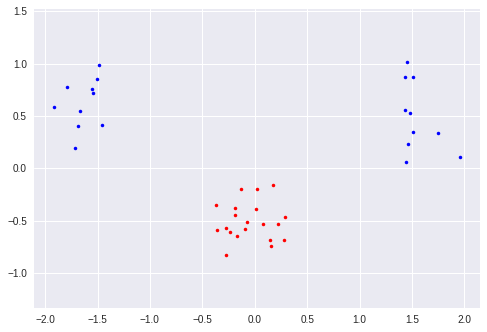

In [0]:
#@title #### Plotting data { form-width: "20%" }
plt.plot([p[0] for p in classA_basic ] ,
         [p[1] for p in classA_basic] ,'b.' )

plt.plot([p[0] for p in classB_basic] ,
         [p[1] for p in classB_basic ], 'r.' )
plt.axis('equal') # Force same s c a l e on both axes
plt.savefig('svmplot.pdf') # Save a copy in a file
plt.show() # Show the plot on the screen

### SECOND DATASET : NON LINEARLY SEPARABLE DUE TO THE POSITION OF THE CLUSTERS

In [0]:
#@title ####Generating data { form-width: "20%" }
#hint np.random.seed(100 ) #you will get the same random data every time you run the program
classA_position= np.concatenate((np.random.randn(10, 2)* 0.2 + [ 0, 0],
                        np.random.randn(10, 2)* 0.2 + [0, 0]))

classB_position = np.random.randn(20, 2)* 0.2 + [0.0, -0.35]

data_samples_position = np.concatenate(( classA_position, classB_position ))
targets_position = np.concatenate(
            (np.ones(classA_position.shape[0]),
            -np.ones(classB_position.shape[0])))

N_position = data_samples_position.shape[0] # number of samples

permute_position = list(range(N_position))
random.shuffle(permute_position)
data_samples_position = data_samples_position[permute_position, :]

targets_position = targets_position[permute_position]

'''Use data_samples_position and targets_position if you want to use the second dataset'''

'Use data_samples_position and targets_position if you want to use the second dataset'

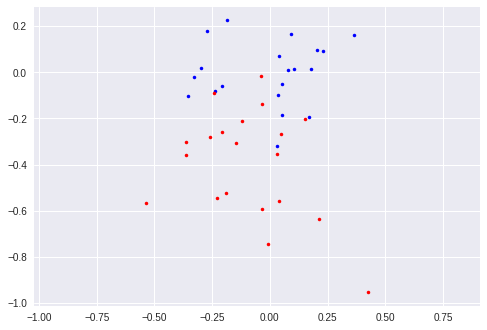

In [0]:
#@title #### Plotting data { form-width: "20%" }
plt.plot([p[0] for p in classA_position ] ,
         [p[1] for p in classA_position] ,'b.' )

plt.plot([p[0] for p in classB_position] ,
         [p[1] for p in classB_position ], 'r.' )
plt.axis('equal') # Force same s c a l e on both axes
plt.savefig('svmplot.pdf') # Save a copy in a file
plt.show() # Show the plot on the screen

### THIRD DATASET : NON LINEARLY SEPARABLE DUE TO A HIGH SIZE OF THE CLUSTERS

In [0]:
#@title ####Generating data { form-width: "20%" }
#hint np.random.seed(100 ) #you will get the same random data every time you run the program
classA_size = np.concatenate((np.random.randn(300, 2)* 0.2 + [ 1.5, 0.5],
                        np.random.randn(300, 2)* 0.2 + [-1.5, 0.5]))

classB_size = np.random.randn(600, 2)* 0.2 + [0.0, -0.5]

data_samples_size = np.concatenate(( classA_size, classB_size ))
targets_size = np.concatenate(
            (np.ones(classA_size.shape[0]),
            -np.ones(classB_size.shape[0])))


N_size = data_samples_size.shape[0] # number of samples

permute_size = list(range(N_size))
random.shuffle(permute_size)
data_samples_size = data_samples_size[permute_size, :]
targets_size = targets_size[permute_size]

'''Use data_samples_size and targers_size if you want to use the second dataset'''


'Use data_samples_size and targers_size if you want to use the second dataset'

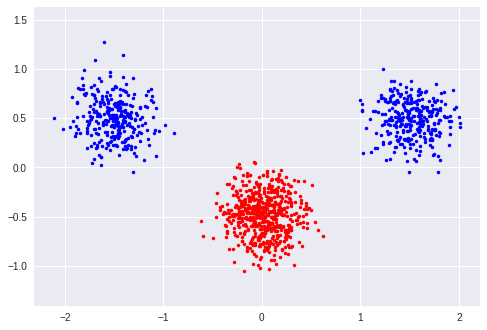

In [0]:
#@title #### Plotting data { form-width: "20%" }
plt.plot([p[0] for p in classA_size ] ,
         [p[1] for p in classA_size ] ,'b.' )

plt.plot([p[0] for p in classB_size ] ,
         [p[1] for p in classB_size ], 'r.' )
plt.axis('equal') # Force same s c a l e on both axes
plt.savefig('svmplot.pdf') # Save a copy in a file
plt.show() # Show the plot on the screen

## 3. Simple linear kernel without slack

In [0]:
targets = targets_basic
data_samples = data_samples_basic
N = N_basic

In [0]:
#Global_variables t targets and K values kernel(xi,xj)
#global variable Pi,j = ti tj K(xi,xj) 
# This matrix should be computed only once, outside of the function objective. Therefore, 
# store it as a numpy array in a global variable.

# global variable
P = np.array([np.array([targets[i]* targets[j]*linear_kernel(data_samples[i], data_samples[j]) for i in range(N)])
     for j in range(N)])

In [0]:
# N is the number of training samples
start = np.zeros(N)
# B = [(0,C) for b in range(N)]
B = [(0,None) for b in range(N)] # if no upper bound

XC = {'type': 'eq', 'fun':zerofun}

In [0]:
ret = minimize(objective, start, bounds = B, constraints =XC)

# This will find the vector alpha which minimizes the function objective within the
# bounds B and the constraints XC.
# it returns a dictionary that's why we use ['x'] to pick the actual alpha values

"""start: a vector with the initial guess of alpha """
"""B : a list of pairs of the same length as alpha vector, stating the 
       lower and the upper bounds for the corresponding element in alpa """
"""XC : impose other constraints in addition to the bounds. Equality constraint 
        sum(alpha i * ti) = 0
        given as a dictionary with the fields type: the type of the constraint 
                                          and fun : the implementation"""

alpha = ret['x']
success = ret['success']  # True if the optimizer actually found a solution

In [0]:
non_zeros_indexes,non_zero_list,non_zero_alpha,non_zero_inputs,non_zero_targets,d = extract_non_zero (alpha, 1e-5,data_samples, targets)


In [0]:
# ##### Calculate the b value using equation 7
# use a point on the margin > 0 and < C (if slack is used)

alpha_sv, sv, t_sv = non_zero_list[0]## here we took the first one just to see 
## but we should take the best and with value < C


#vector_to_sum_sv_1 = np.array([alpha[i] * targets[i] * 
#                             linear_kernel(sv,data_samples[i]) for i in range(N)])

vector_to_sum_sv_2 = np.array([non_zero_alpha[j]* 
                                    non_zero_targets[j]*
                                    linear_kernel(sv, non_zero_inputs[j]) for j in range(d)])

#b1 = np.sum(vector_to_sum_sv_1) - t_sv
b = np.sum(vector_to_sum_sv_2) - t_sv



We have the same value using all the data points or just the non_zero points which is logical because for zero values alpha is null . Then to optimize we use the version with just non zero values.

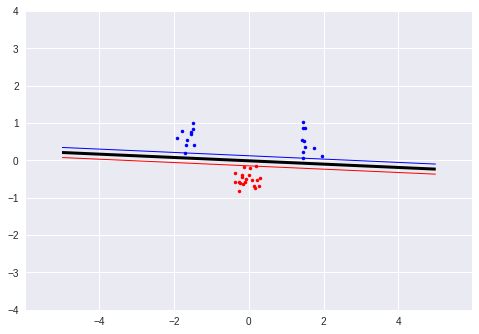

In [0]:
plt.plot([p[0] for p in classA_basic ] ,
         [p[1] for p in classA_basic ] ,'b.' )

plt.plot([p[0] for p in classB_basic ] ,
         [p[1] for p in classB_basic ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],linear_kernel,b) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()

## 4. Implementing general SVM with slack and different kernels with parameters

In [0]:
#@title ### SVM function with the different possible parameters { form-width: "20%" }
def SVM(data_samples, targets,N, kernel,C=None, param=None):
  global P
  P = np.array([np.array([targets[i]* targets[j]*kernel(data_samples[i], data_samples[j],  param=param) for i in range(N)])
     for j in range(N)])
  
  start = np.zeros(N)
  
  if C is not None:
    B = [(0,C) for b in range(N)]
  
  else:
    B = [(0,None) for b in range(N)] # if no upper bound
  
  XC = {'type': 'eq', 'fun':zerofun}
  
  ret = minimize(objective, start, bounds = B, constraints =XC)
  alpha = ret['x']
  success = ret['success']
  non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = extract_non_zero(alpha, 1e-5,data_samples, targets, C)
  
  alpha_sv, sv, t_sv = non_zero_list[0]

  vector_to_sum_sv_2 = np.array([non_zero_alpha[j]* 
                                    non_zero_targets[j]*
                                    kernel(sv, non_zero_inputs[j], param=param) for j in range(d)])
  #vector_to_sum_sv_1 = np.array([alpha[j]* 
                                   #targets[j]*
                                   # kernel(sv, data_samples[j], sigma=sigma, degree = degree) for j in range(N)])


  b = np.sum(vector_to_sum_sv_2) - t_sv
  print('SVM has successfully seperated the classes ', success)
  return(b,  non_zeros_indexes,non_zero_list,non_zero_alpha,non_zero_inputs,non_zero_targets,d )

# TODO

### 4.1 Move the clusters around and change their sizes to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the optimizer (minimize function) is not able to find a solution at all.

### First configuration : linearly separable datapoints

('SVM has successfully seperated the classes ', True)


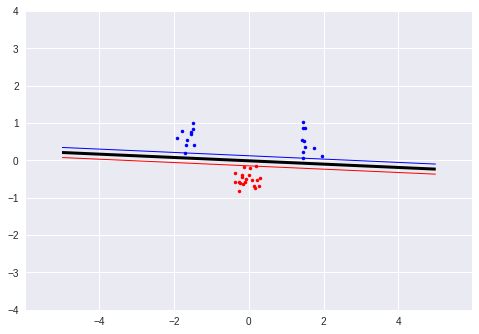

0.19583106041


In [0]:
#@title #### Linear kernel { form-width: "10%" }
import time

targets = targets_basic
data_samples = data_samples_basic
N = N_basic

t0 = time.time()
b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,linear_kernel)
plt.plot([p[0] for p in classA_basic ] ,
         [p[1] for p in classA_basic ] ,'b.' )

plt.plot([p[0] for p in classB_basic ] ,
         [p[1] for p in classB_basic ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],linear_kernel,b) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()
t1=time.time()
print(t1-t0)

### Second configuration : non linearly separable data points due to the position of the clusters

('SVM has successfully seperated the classes ', False)


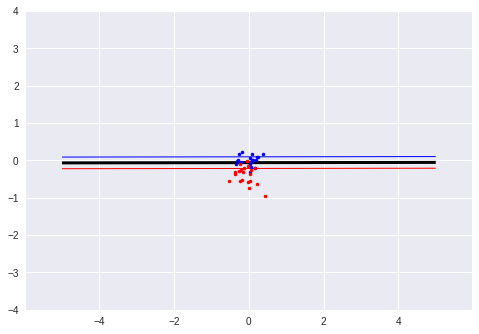

0.480626106262


In [0]:
#@title #### Linear kernel { form-width: "10%" }
targets = targets_position
data_samples= data_samples_position
N= N_position


t0=time.time()
b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples_position, targets_position,N_position,linear_kernel)
plt.plot([p[0] for p in classA_position ] ,
         [p[1] for p in classA_position ] ,'b.' )

plt.plot([p[0] for p in classB_position ] ,
         [p[1] for p in classB_position ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],linear_kernel,b) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()
t1 = time.time()
print(t1-t0)

As we can see, the boundary between the two data-set is not really clear, many points are not well-separated.

#### Third configuration : non linearly separable due to a high size of the clusters

('SVM has successfully seperated the classes ', False)


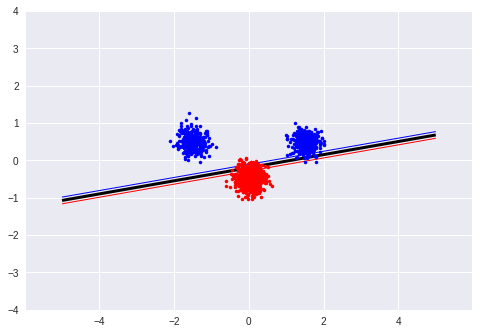

459.772775173
It takes a huge amount of time since we deal with matrices of 1200 * 1200 


In [0]:
#@title #### Linear kernel { form-width: "10%" }
targets = targets_size
data_samples = data_samples_size
N = N_size
t0 = time.time()
b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,linear_kernel)
plt.plot([p[0] for p in classA_size ] ,
         [p[1] for p in classA_size ] ,'b.' )

plt.plot([p[0] for p in classB_size ] ,
         [p[1] for p in classB_size ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],linear_kernel,b) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()
t1 = time.time()
print(t1-t0)
print('It takes a huge amount of time since we deal with matrices of 1200 * 1200 ')

In this situation, the problem is that the number of points is becoming too big. The variance in the data makes it impossible for the SVM to make a linearly separable boundary.

### 4.2 Implement the two non-linear kernels. You should be able to classify very hard data sets with these. (TO DO : the dars sets)

### Polynomial kernel

#### Linearly separable dataset

('SVM has successfully seperated the classes ', True)


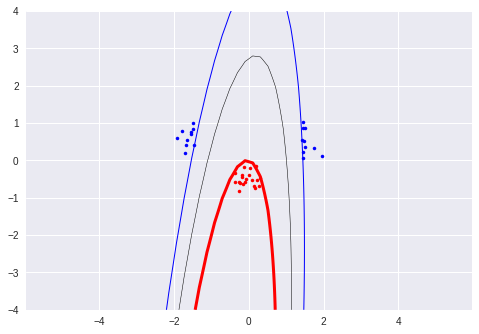

In [0]:
#@title #### Polynomial kernel with degree = 2 { form-width: "10%" }
targets = targets_basic
data_samples = data_samples_basic
N = N_basic

degree = 2

b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,Polynomial_kernel, param=degree)
plt.plot([p[0] for p in classA_basic ] ,
         [p[1] for p in classA_basic ] ,'b.' )

plt.plot([p[0] for p in classB_basic ] ,
         [p[1] for p in classB_basic ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],Polynomial_kernel,b,param = degree) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(3,0.5,1))
plt.show()

It gives pretty good results with the basic dataset. Now, let's test it with the non-linearly separable datasets.

#### Non linearly separable datasets

##### Non linearly separable dataset : position

('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)


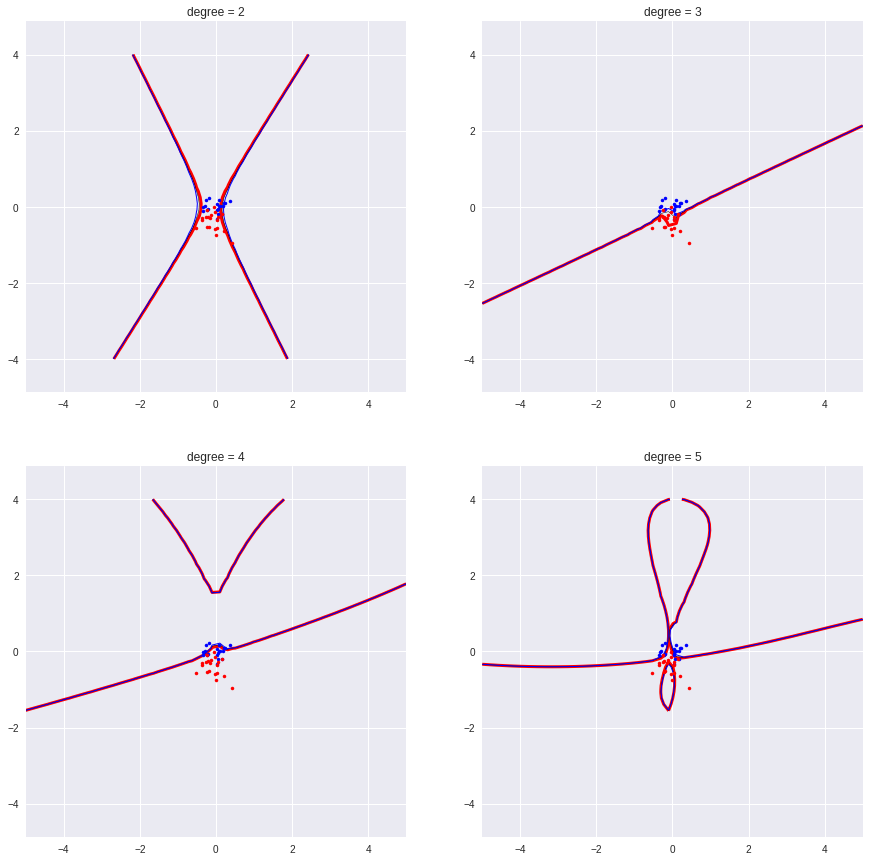

In [0]:
#@title #### Polynomial kernel with degrees from  2 to 5 { form-width: "10%" }
targets = targets_position
data_samples = data_samples_position
N = N_position

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
axes = [ax1, ax2, ax3, ax4]
degree_vals= [2,3,4,5]
for i in range(4):
  degree = degree_vals[i]
  ax=axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,Polynomial_kernel, param=degree)
  ax.plot([p[0] for p in classA_position ] ,
           [p[1] for p in classA_position ] ,'b.' )

  ax.plot([p[0] for p in classB_position ] ,
           [p[1] for p in classB_position ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-5, 5)
  ygrid = np.linspace(-4, 4)
  grid = np.array([[indicator([x,y],Polynomial_kernel,b,param = degree) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(3,0.5,1))
  ax.set_title("degree = "+str(degree))

With degree = 2, it's not clearly separated, you still have many misclassified points. Let's upgrade the degree to see.

It seems that now it's well separated. We can see that by changing the kind of kernel, we we're able to separate non-linearly separable datas.

##### Non linearly separable dataset : size

('SVM has successfully seperated the classes ', True)


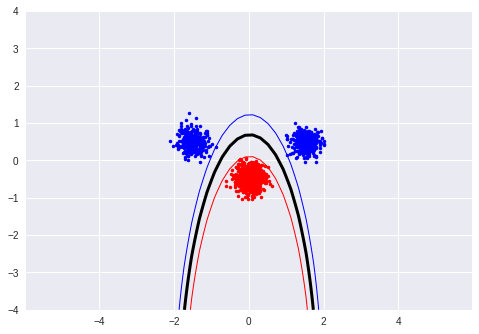

In [0]:
#@title #### polynomial  { form-width: "10%" }
targets = targets_size
data_samples = data_samples_size
N = N_size
degree = 2

b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,Polynomial_kernel,param=degree)
plt.plot([p[0] for p in classA_size] ,
         [p[1] for p in classA_size ] ,'b.' )

plt.plot([p[0] for p in classB_size ] ,
         [p[1] for p in classB_size ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],Polynomial_kernel,b,degree) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()

We can already solve this problem with a polynomial kernel with degree = 2. 

### RBF Kernel

#### Linearly separable dataset

('SVM has successfully seperated the classes ', True)


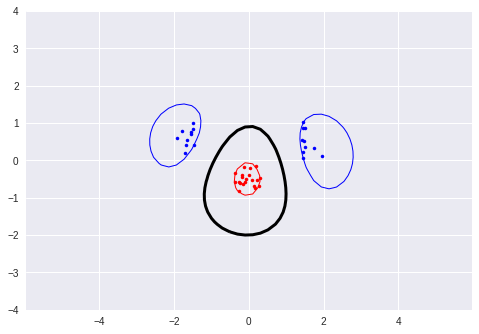

In [0]:
#@title #### RBF kernel with sigma = 1 { form-width: "10%" }
targets = targets_basic
data_samples = data_samples_basic
N = N_basic

sigma = 1

b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,RBF_kernel,param=sigma)
plt.plot([p[0] for p in classA_basic ] ,
         [p[1] for p in classA_basic ] ,'b.' )

plt.plot([p[0] for p in classB_basic ] ,
         [p[1] for p in classB_basic ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],RBF_kernel,b,sigma) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()

#### Non linearly separable dataset : Position

('SVM has successfully seperated the classes ', True)


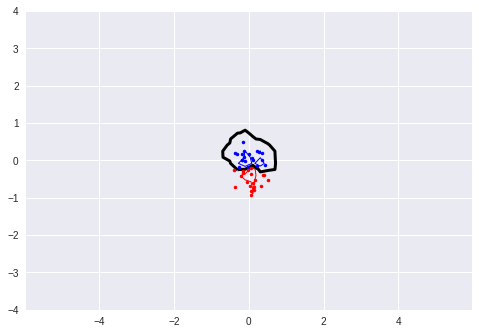

In [0]:
#@title #### RBF kernel with sigma = 1 { form-width: "10%" }
targets = targets_position
data_samples = data_samples_position
N = N_position
sigma = 0.1

b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,RBF_kernel,param=sigma)
plt.plot([p[0] for p in classA_position] ,
         [p[1] for p in classA_position ] ,'b.' )

plt.plot([p[0] for p in classB_position ] ,
         [p[1] for p in classB_position ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],RBF_kernel,b,sigma) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()

We don't have really good results with the RBF Kernel on this dataset

#### Non linearly separable : size

('SVM has successfully seperated the classes ', True)


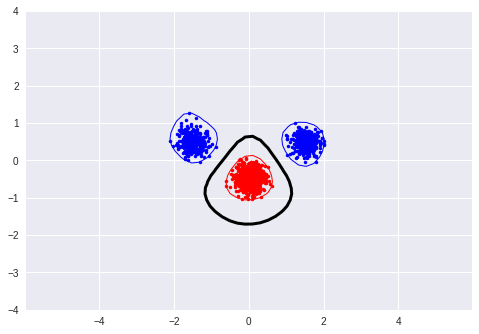

In [0]:
#@title #### RBF kernel with sigma = 1 { form-width: "10%" }
targets= targets_size
data_samples = data_samples_size
N = N_size

sigma = 0.5

b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                    data_samples, targets,N,RBF_kernel,param=sigma)
plt.plot([p[0] for p in classA_size] ,
         [p[1] for p in classA_size ] ,'b.' )

plt.plot([p[0] for p in classB_size ] ,
         [p[1] for p in classB_size ], 'r.' )

plt.axis('equal') # Force same scale on both axes
xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x,y],RBF_kernel,b,sigma) 
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
            (-1.0, 0.0, 1.0), 
            colors = ('red', 'black', 'blue'),
            linewidths=(1,3,1))
plt.show()

Instead, we obtain very good results for this kind of problems.

### 4.3 The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the biasvariance trade-off.

#### Linearly separable data

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


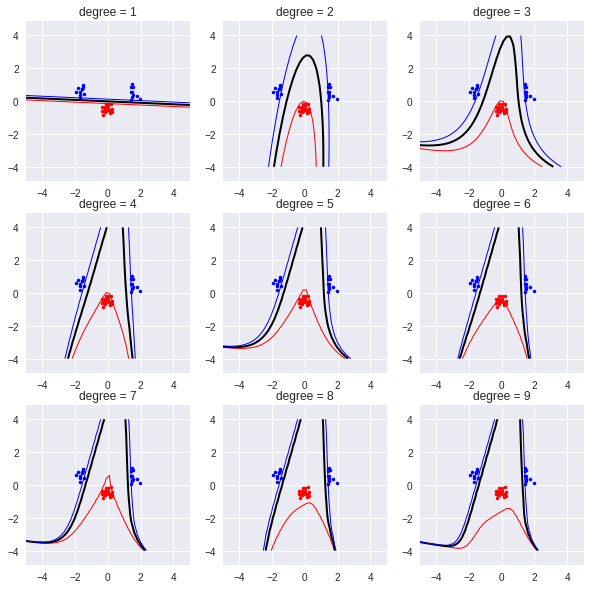

In [0]:
#@title ####Influence of the degree on the Polynomial kernel { form-width: "10%" }

targets = targets_basic
data_samples = data_samples_basic
N = N_basic

degree_vals = np.arange(1,10)
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(9):
  degree = degree_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,Polynomial_kernel, param=degree)
  ax.plot([p[0] for p in classA_basic ] ,
           [p[1] for p in classA_basic ] ,'b.' )

  ax.plot([p[0] for p in classB_basic ] ,
           [p[1] for p in classB_basic ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-5, 5)
  ygrid = np.linspace(-4, 4)
  grid = np.array([[indicator([x,y],Polynomial_kernel,b,param = degree) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('degree = '+ str(degree))
  
plt.show()

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


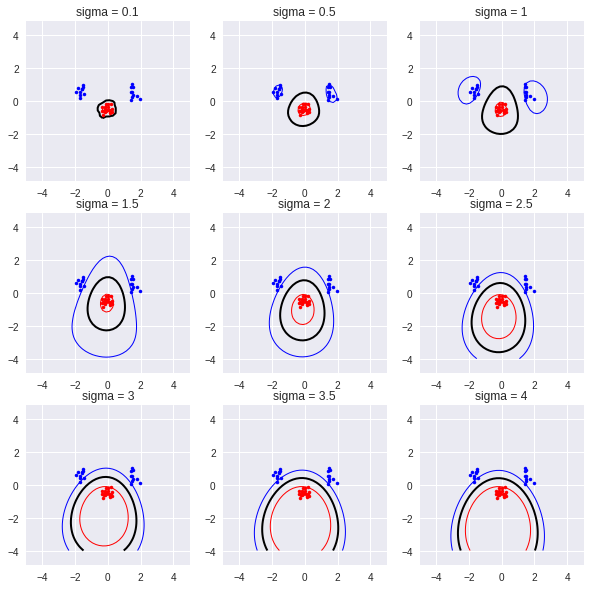

In [0]:
#@title #### influence of sigma on the RBF_kernel { form-width: "10%" }
sigma_vals = [0.1,0.5,1,1.5, 2, 2.5, 3, 3.5, 4]
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(9):
  sigma = sigma_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,RBF_kernel, param=sigma)
  ax.plot([p[0] for p in classA_basic ] ,
           [p[1] for p in classA_basic ] ,'b.' )

  ax.plot([p[0] for p in classB_basic ] ,
           [p[1] for p in classB_basic ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-5, 5)
  ygrid = np.linspace(-4, 4)
  grid = np.array([[indicator([x,y],RBF_kernel,b,param = sigma) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('sigma = '+ str(sigma))
  
plt.show()

#### Non linearly separable dataset : position

('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', False)


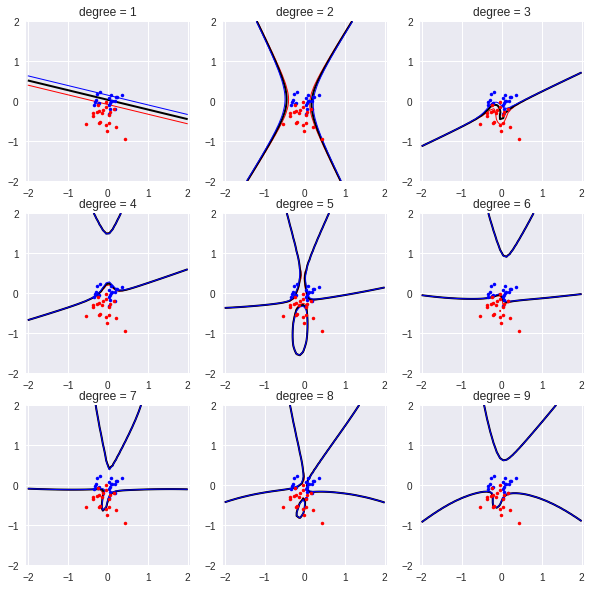

In [0]:
#@title ####Influence of the degree on the Polynomial kernel { form-width: "10%" }
degree_vals = np.arange(1,10)
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]

targets= targets_position
data_samples = data_samples_position
N = N_position

for i in range(9):
  degree = degree_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,Polynomial_kernel, param=degree)
  ax.plot([p[0] for p in classA_position ] ,
           [p[1] for p in classA_position ] ,'b.' )

  ax.plot([p[0] for p in classB_position ] ,
           [p[1] for p in classB_position ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-2, 2)
  ygrid = np.linspace(-2, 2)
  grid = np.array([[indicator([x,y],Polynomial_kernel,b,param = degree) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('degree = '+ str(degree))
  
plt.show()

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', False)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


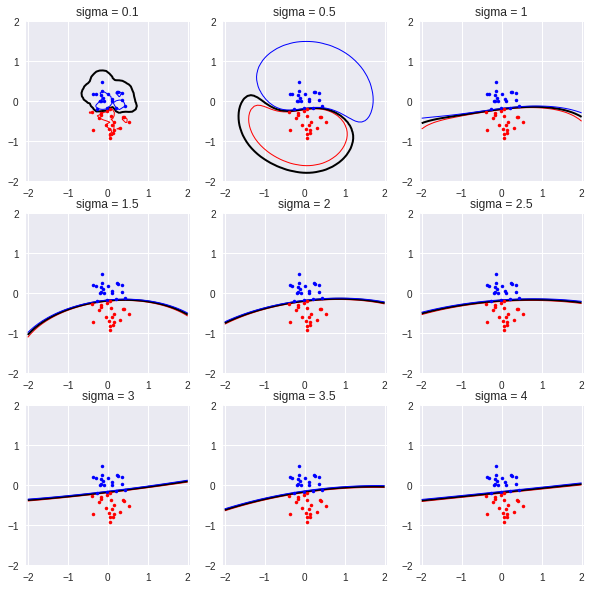

In [0]:
#@title #### influence of sigma on the RBF_kernel { form-width: "10%" }
sigma_vals = [0.1,0.5,1,1.5, 2, 2.5, 3, 3.5, 4]
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]

targets= targets_position
data_samples = data_samples_position
N = N_position

for i in range(9):
  sigma = sigma_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,RBF_kernel, param=sigma)
  ax.plot([p[0] for p in classA_position ] ,
           [p[1] for p in classA_position ] ,'b.' )

  ax.plot([p[0] for p in classB_position ] ,
           [p[1] for p in classB_position ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-2, 2)
  ygrid = np.linspace(-2, 2)
  grid = np.array([[indicator([x,y],RBF_kernel,b,param = sigma) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('sigma = '+ str(sigma))
  
plt.show()

### 4.4 Explore the role of the slack parameter C. What happens for very large/small values?

#### Linearly separable dataset

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


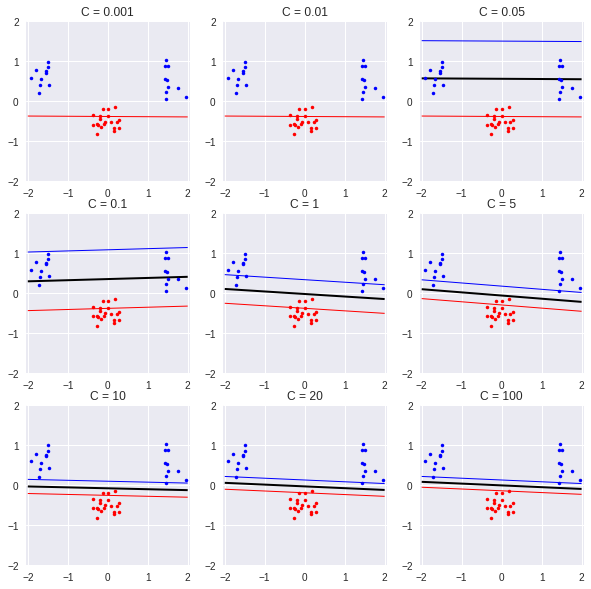

In [0]:
# @title ####Exploring C effect on the linear kernel
C_vals = [0.001,0.01,0.05,0.1,1,5,10,20,100]
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]

targets= targets_basic
data_samples = data_samples_basic
N = N_basic

for i in range(9):
  C = C_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,linear_kernel,C)
  ax.plot([p[0] for p in classA_basic ] ,
           [p[1] for p in classA_basic ] ,'b.' )

  ax.plot([p[0] for p in classB_basic ] ,
           [p[1] for p in classB_basic ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-2, 2)
  ygrid = np.linspace(-2, 2)
  grid = np.array([[indicator([x,y],linear_kernel,b) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('C = '+ str(C))
  
plt.show()

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


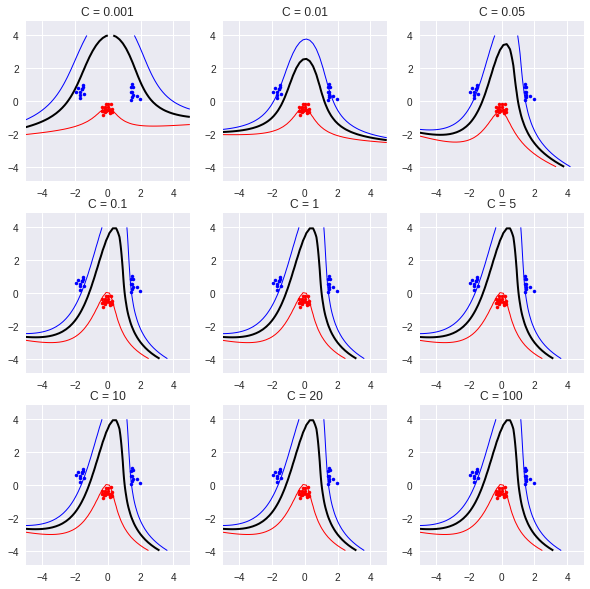

In [0]:
# @title ####Exploring C effect on the Polynomial kernel of degree 3
C_vals = [0.001,0.01,0.05,0.1,1,5,10,20,100]
plt.figure(figsize = (20,20))
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]
degree = 3
for i in range(9):
  C = C_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,Polynomial_kernel,C, param=degree)
  ax.plot([p[0] for p in classA_basic ] ,
           [p[1] for p in classA_basic ] ,'b.' )

  ax.plot([p[0] for p in classB_basic ] ,
           [p[1] for p in classB_basic ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-5, 5)
  ygrid = np.linspace(-4, 4)
  grid = np.array([[indicator([x,y],Polynomial_kernel,b,param = degree) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('C = '+ str(C))
  
plt.show()

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


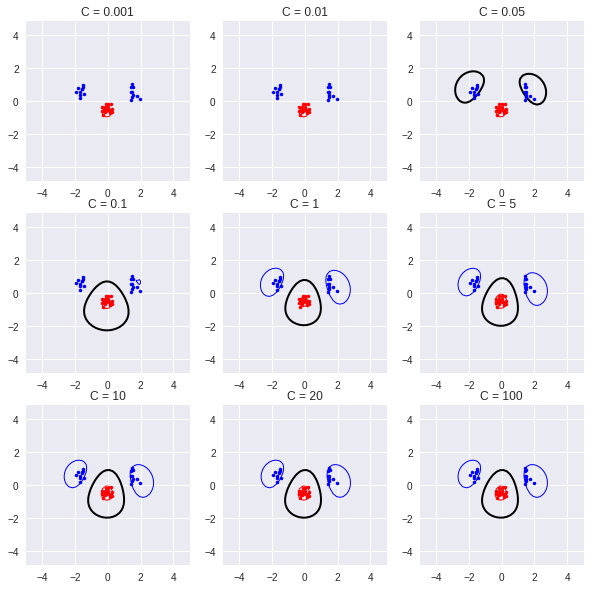

In [0]:
# @title ####Exploring C effect on the RBF kernel with sigma 1
C_vals = [0.001,0.01,0.05,0.1,1,5,10,20,100]
plt.figure(figsize = (20,20))
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]
sigma = 1
for i in range(9):
  C = C_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,RBF_kernel,C, param=sigma)
  ax.plot([p[0] for p in classA_basic ] ,
           [p[1] for p in classA_basic ] ,'b.' )

  ax.plot([p[0] for p in classB_basic ] ,
           [p[1] for p in classB_basic ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-5, 5)
  ygrid = np.linspace(-4, 4)
  grid = np.array([[indicator([x,y],RBF_kernel,b,param = sigma) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('C = '+ str(C))
  
plt.show()

#### Non linearly separable dataset : position

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


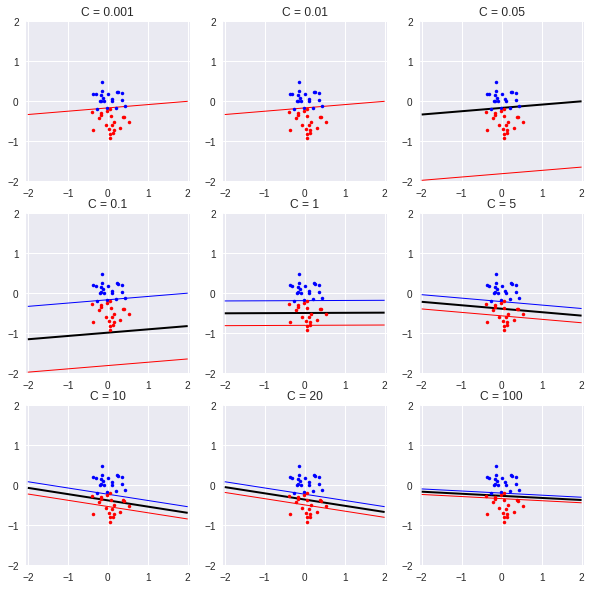

In [0]:
#@title ####Exploring C effect on the linear kernel { form-width: "10%" }
C_vals = [0.001,0.01,0.05,0.1,1,5,10,20,100]
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]

targets= targets_position
data_samples = data_samples_position
N = N_position

for i in range(9):
  C = C_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,linear_kernel,C)
  ax.plot([p[0] for p in classA_position ] ,
           [p[1] for p in classA_position ] ,'b.' )

  ax.plot([p[0] for p in classB_position ] ,
           [p[1] for p in classB_position ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-2, 2)
  ygrid = np.linspace(-2, 2)
  grid = np.array([[indicator([x,y],linear_kernel,b) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('C = '+ str(C))
  
plt.show()

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


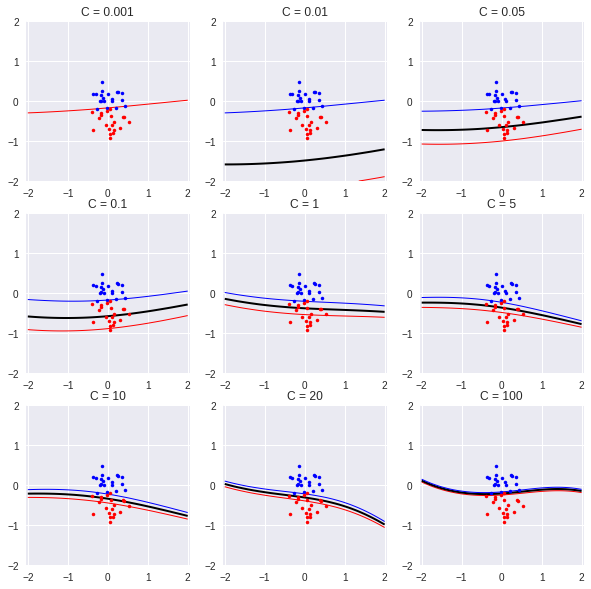

In [0]:
#@title ####Exploring C effect on the Polynomial kernel of degree 3 { form-width: "10%" }
C_vals = [0.001,0.01,0.05,0.1,1,5,10,20,100]
plt.figure(figsize = (20,20))
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]
degree = 3

targets= targets_position
data_samples = data_samples_position
N = N_position 

for i in range(9):
  C = C_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,Polynomial_kernel,C, param=degree)
  ax.plot([p[0] for p in classA_position ] ,
           [p[1] for p in classA_position ] ,'b.' )

  ax.plot([p[0] for p in classB_position ] ,
           [p[1] for p in classB_position ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-2, 2)
  ygrid = np.linspace(-2, 2)
  grid = np.array([[indicator([x,y],Polynomial_kernel,b,param = degree) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('C = '+ str(C))
  
plt.show()

('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)
('SVM has successfully seperated the classes ', True)


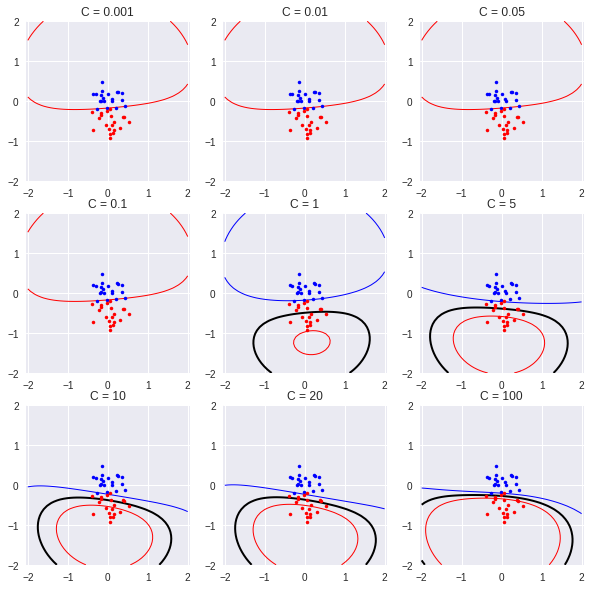

In [0]:
#@title ####Exploring C effect on the RBF kernel with sigma 1 { form-width: "10%" }
C_vals = [0.001,0.01,0.05,0.1,1,5,10,20,100]
plt.figure(figsize = (20,20))
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
axes = [ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8, ax9]

targets= targets_position
data_samples = data_samples_position
N = N_position
sigma = 1
for i in range(9):
  C = C_vals[i]
  ax = axes[i]
  b,non_zeros_indexes,non_zero_list, non_zero_alpha,non_zero_inputs,non_zero_targets,d = SVM(
                                      data_samples, targets,N,RBF_kernel,C, param=sigma)
  ax.plot([p[0] for p in classA_position ] ,
           [p[1] for p in classA_position ] ,'b.' )

  ax.plot([p[0] for p in classB_position ] ,
           [p[1] for p in classB_position ], 'r.' )

  ax.axis('equal') # Force same scale on both axes
  xgrid = np.linspace(-2, 2)
  ygrid = np.linspace(-2, 2)
  grid = np.array([[indicator([x,y],RBF_kernel,b,param = sigma) 
                    for x in xgrid]
                   for y in ygrid])

  ax.contour(xgrid, ygrid, grid, 
              (-1.0, 0.0, 1.0), 
              colors = ('red', 'black', 'blue'),
              linewidths=(1,2,1))
  ax.set_title('C = '+ str(C))
  
plt.show()

### 4.5 Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model (kernel) and vice versa?